In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
k_1 = 0.1
k_steady = 1
T = 220
delta = 0.02
beta = 0.96

In [4]:
import numpy as np
k = np.zeros(T)
c = np.zeros(T)

In [5]:
def new_capital(k, c):
    return 0.185 * (k ** (1/3)) + (1 - delta)*k - c

In [6]:
def new_consumption(k, c):
    return beta *c*(1 - delta + (0.185 / (3*k**(2/3))))

In [7]:
k_low = k_1
k_up = new_capital(k_1, 0)
k_guess = [k_low]
ind = 0

In [8]:
j = 1
while True:
    k_guess.append((k_low + k_up) / 2)
    k[2] = k_guess[j] 
    c_1 = 0.185 * (k_1 ** (1/3)) + (1 - delta)*k_1 - k_guess[j]
    c[1] = c_1
    ind = 3
    for i in range(3, T):
        c_next = new_consumption(k[i-1], c[i-2])
        c[i-1] = c_next
        k_next = new_capital(k[i-1], c[i-1])
        k[i] = k_next
        if (k_next < k_1):
            ind = 0
            k_low = k[2]
            break
        if (k_next > k_steady):
            ind = 1
            k_up = k[2]
            break
    if (ind == 3):
        break
    if abs(k_guess[j] - k_guess[j-1]) < 10 ** (-15):
        break
    else:
        j = j + 1

In [9]:
k[2] = k_guess[len(k_guess) - 1] 
c_1 = 0.185 * (k_1 ** (1/3)) + (1 - delta)*k_1 - k_guess[len(k_guess) - 1]
c[1] = c_1
ind = 3
for i in range(3, T):
    c_next = new_consumption(k[i-1], c[i-2])
    c[i-1] = c_next
    k_next = max(new_capital(k[i-1], c[i-1]), k[i-1])
    k[i] = k_next

Text(0,0.5,'k(t)')

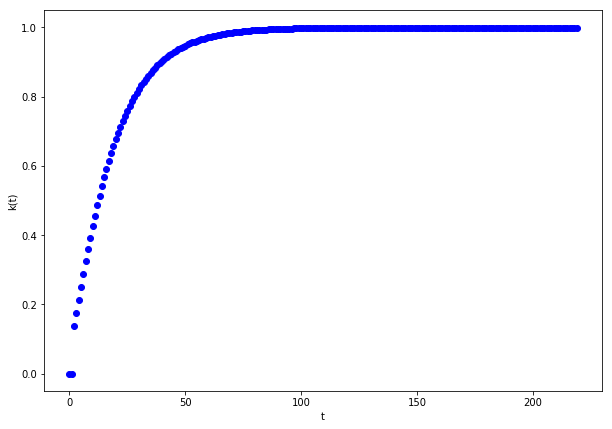

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(k, 'bo')
plt.xlabel('t')
plt.ylabel('k(t)')

Text(0,0.5,'c(t)')

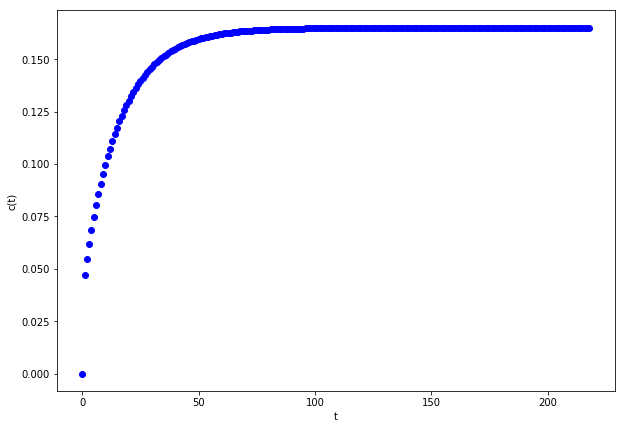

In [11]:
plt.plot(c[:T-1], 'bo')
plt.xlabel('t')
plt.ylabel('c(t)')